In [7]:
using Pkg
Pkg.activate(".")
using Plots
using Revise
using NNeutronics
using Interact
using Printf

  Activating project at `~/.julia/dev/NNeutronics/example`
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


WebIO._IJuliaInit()

In [8]:
println(join(NNeutronics.col_names(), ","))
println(length(NNeutronics.col_names()))

d1,d2,d3,Li6,TBR,escape_0.013,escape_0.038,escape_0.062,escape_0.087,escape_0.113,escape_0.138,escape_0.162,escape_0.188,escape_0.213,escape_0.237,escape_0.263,escape_0.287,escape_0.312,escape_0.338,escape_0.362,escape_0.388,escape_0.412,escape_0.438,escape_0.463,escape_0.487,escape_0.512,escape_0.538,escape_0.562,escape_0.587,escape_0.613,escape_0.637,escape_0.663,escape_0.688,escape_0.712,escape_0.738,escape_0.762,escape_0.788,escape_0.812,escape_0.837,escape_0.863,escape_0.887,escape_0.913,escape_0.938,escape_0.975,escape_1.250,escape_1.750,escape_2.250,escape_2.750,escape_3.250,escape_3.750,escape_4.250,escape_4.750,escape_5.250,escape_5.750,escape_6.250,escape_6.750,escape_7.250,escape_7.750,escape_8.250,escape_8.750,escape_9.250,escape_9.750,escape_10.250,escape_10.750,escape_11.250,escape_11.750,escape_12.250,escape_12.750,escape_13.250,escape_13.750,escape_14.250,escape_14.750,heating_0.012,heating_0.037,heating_0.062,heating_0.088,heating_0.112,heating_0.137,heating_0.162,heat

In [9]:
blanket = Blanket();

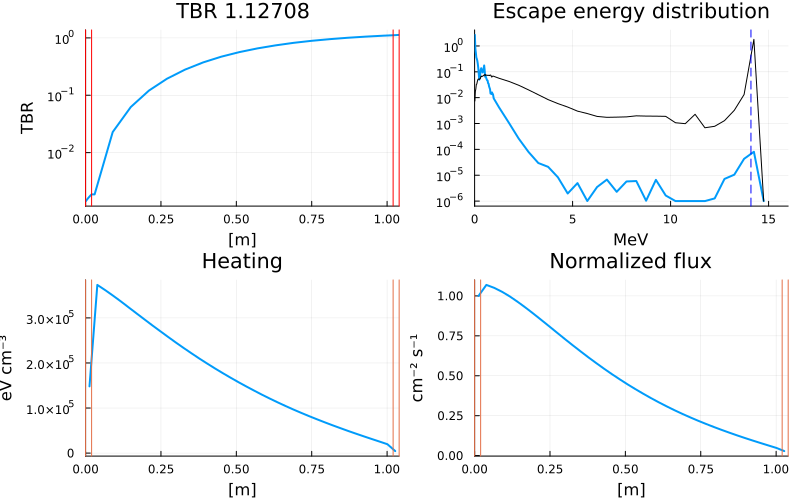

In [26]:
min_flux = 1E-6
min_heating = 1E-6
min_energy = 1E-6

#@manipulate for d1 in blanket.D1, d2 in blanket.D2, d3 in blanket.D3, Li6 in blanket.enrichment
    d1 = 0.02
    d2 = 1.00
    d3 = 0.02
    Li6 = 20.0
    r1 = d1 + d2 + d3

    # TBR
    x = LinRange(blanket.D1[1], d1, 100)
    x1 = x
    y1 = TBR.(blanket, x, blanket.D2[1], blanket.D3[1], Li6)
    x = LinRange(blanket.D2[1], d2, 100)
    x2 = d1 .+ x
    y2 = TBR.(blanket, d1, x, blanket.D3[1], Li6)
    x = LinRange(blanket.D3[1], d3, 100)
    x3 = d1 .+ d2 .+ x
    y3 = TBR.(blanket, d1, d2, x, Li6)
    final_TBR = TBR(blanket, d1, d2, d3, Li6)
    pt = Plots.plot(vcat(x1, x2, x3), vcat(y1, y2, y3), lw=2, label="", title=@sprintf("TBR %g", final_TBR))
#    hline!(pt, [1.0], label="", color=:green, linestyle=:dash)
#    hline!(pt, [final_TBR], label="", color=:orange, linestyle=:dash)
    vline!(pt, [0.0, d1, d1 + d2, d1 + d2 + d3], label="", color=:red)
    plot!(pt, xlabel="[m]", xlim=[0.0, d1 + d2 + d3], yscale=:log10, ylabel="TBR")

    # escape
    denergy = diff(NNeutronics.energy_edges())
    pe = plot(blanket.energy_grid, leakeage_energy(blanket, d1, d2, d3, Li6, blanket.energy_grid) ./ denergy .+ min_energy, label="", lw=2)
    plot!(pe, blanket.energy_grid, leakeage_energy(blanket, blanket.D1[1], blanket.D2[1], blanket.D3[1], 1.0, blanket.energy_grid) ./ denergy .+ min_energy, color=:black, label="")
    vline!(pe, [14.1], color=:blue, linestyle=:dash, label="")
    plot!(pe, xlabel="MeV", yscale=:log10, xlim=[0, 16], title="Escape energy distribution")

    # heating
    dradial = diff(NNeutronics.radial_edges())
    ph = plot(blanket.radial_grid * r1, heating(blanket, d1, d2, d3, Li6, blanket.radial_grid) .+ min_heating, label="", lw=2)
    vline!(ph, [0.0, d1, d1 + d2, d1 + d2 + d3], label="")
    plot!(ph, xlabel="[m]", xlim=[0, r1], title="Heating", ylabel="eV cm⁻³")#,yscale=:log10)

    # flux
    norm = flux(blanket, d1, d2, d3, Li6, blanket.radial_grid)[1] .+ min_flux
    pf = plot(blanket.radial_grid * r1, (flux(blanket, d1, d2, d3, Li6, blanket.radial_grid) .+ min_flux)/norm, label="", lw=2)
    vline!(pf, [0.0, d1, d1 + d2, d1 + d2 + d3], label="")
    plot!(pf, xlabel="[m]", xlim=[0, r1], title="Normalized flux", ylabel="cm⁻² s⁻¹")#,yscale=:log10)

    plot(pt, pe, ph, pf, layout=4, size=(800, 500))
#end

In [27]:
@show length(blanket.D1)
@show length(blanket.D2)
@show length(blanket.D3)
@show length(blanket.enrichment)
length(blanket.D1) * length(blanket.D2) * length(blanket.D3) * length(blanket.enrichment)

length(blanket.D1) = 11
length(blanket.D2) = 26
length(blanket.D3) = 5
length(blanket.enrichment) = 10


14300

In [ ]:
fieldnames(typeof(blanket))